# The agent-environment interaction

In this exercise, you will implement the interaction of a reinforecment learning agent with its environment. We will use the gridworld environment from the second lecture. You will find a description of the environment below, along with two pieces of relevant material from the lectures: the agent-environment interface and the Q-learning algorithm.

1. Create an agent that chooses actions randomly with this environment.

2. Create an agent that uses Q-learning. You can use initial Q values of 0, a stochasticity parameter for the $\epsilon$-greedy policy function $\epsilon=0.05$, and a learning rate $\alpha = 0.1$. But feel free to experiment with other settings of these three parameters.

3. Plot the mean total reward obtained by the two agents through the episodes. This is called a **learning curve**. Run enough episodes for the Q-learning agent to converge to a near-optimal policy.


## The agent-environment interface

<img src="https://raw.githubusercontent.com/dkasthurirathna/dl/master/agent-environment.png" style="width: 500px;" align="left"/>

<br><br><br>

The interaction of the agent with its environments starts at decision stage $t=0$ with the observation of the current state $s_0$. (Notice that there is no reward at this initial stage.) The agent then chooses an action to execute at decision stage $t=1$. The environment responds by changing its state to $s_1$ and returning the numerical reward signal $r_1$.


## The environment: Navigation in a gridworld

<img src="https://raw.githubusercontent.com/dkasthurirathna/dl/master/gold.png" style="width: 250px;" align="left"/>

The agent has four possible actions in each state (grid square): west, north, south, and east. The actions are unreliable. They move the agent in the intended direction with probability 0.8, and with probability 0.2, they move the agent in a random other direction. It the direction of movement is blocked, the agent remains in the same grid square. The initial state of the agent is one of the five grid squares at the bottom, selected randomly. The grid squares with the gold and the bomb are **terminal states**. If the agent finds itself in one of these squares, the episode ends. Then a new episode begins with the agent at the initial state.

You will use a reinforcement learning algorithm to compute the best policy for finding the gold with as few steps as possible while avoiding the bomb. For this, we will use the following reward function: $-1$ for each navigation action, an additional $+10$ for finding the gold, and an additional $-10$ for hitting the bomb. For example, the immediate reward for transitioning into the square with the gold is $-1 + 10 = +9$. Do not use discounting (that is, set $\gamma=1$).

## Q-learning

![title](https://raw.githubusercontent.com/dkasthurirathna/dl/master/q.png)
From Sutton & Barto (1998), Reinforcement Learning.

Q-Learning Agent:Now create an agent that uses Q-learning.

Q-learning is a simple RL algorithm that learns the best actions based on rewards

In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

# Classes for the Enviroment and the Agent

- The GridWorld class contains the environment
- The dimensions of the environment are defined
- Locations of all rewards are stored
- Functions for different methods written
    - `get_available_actions` returns possible actions
    - `agent_on_map` prints out current location of the agent on the grid (used for debugging)
    - `get_reward` returns the reward for an input position
    - `make_step` moves the agent in a specified direction

In [ ]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        #edited Q1-5 (execution time -up , converge change - graph)
        #Grid size:height = 100, width = 100 → 100x100 grid.
        self.height = 100
        self.width = 100
        #Each square is initialized with -1 (small penalty per move).
        self.grid = np.zeros(( self.height, self.width)) - 1

        # Set random start location for the agent
        #Start position:Robot starts at row 4, random column between 0 and 4.
        self.current_location = ( 4, np.random.randint(0,5))

        # Set locations for the bomb and the gold
        #first row (starting from 0 so first means the second row)
        self.bomb_location = (1,3)
        self.gold_location = (0,3)
        self.terminal_states = [ self.bomb_location, self.gold_location]

        # Set grid rewards for special cells
        self.grid[ self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid[ self.gold_location[0], self.gold_location[1]] = 10

        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']


    ## Put methods here: Returns the list of actions the robot can take.
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions

   #See where the robot is
    def agent_on_map(self):
        """Prints out current location of the agent on the grid (used for debugging)"""
        grid = np.zeros(( self.height, self.width))
        grid[ self.current_location[0], self.current_location[1]] = 1
        return grid

   #Check reward
    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]

   #Move the robot
    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location

        #The robot tries to move in the direction chosen (UP, DOWN, LEFT, RIGHT).
        #If it hits a border, it stays in place and just gets the reward for that square.
        #If it moves successfully, it updates its location and returns the reward at the new spot

        # UP
        if action == 'UP':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)

        # DOWN
        elif action == 'DOWN':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)

        # LEFT
        elif action == 'LEFT':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)

        return reward
    #Check if game is over
    def check_state(self):
        """Check if the agent is in a terminal state (gold or bomb), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [ ]:
class RandomAgent():
    # Choose a random actiony (does not learn),It interacts with the environment but does not improve over time.
    def choose_action(self, available_actions):
        """Returns a random choice of the available actions"""
        return np.random.choice(available_actions)

In [ ]:
import random

class Q_Agent():
    # Initialise-Setup the Agent’s Brain
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict()   # Store all Q-values in dictionary of dictionaries
        for x in range(environment.height):      # Loop through all possible grid spaces, create sub-dictionary for each
            for y in range(environment.width):
                self.q_table[(x, y)] = {'UP': 0.0, 'DOWN': 0.0, 'LEFT': 0.0, 'RIGHT': 0.0}  # possible moves

        self.epsilon = epsilon #Controls how often the agent explores randomly (5% chance here).
        self.alpha = alpha #Learning speed (how much it updates what it learns).
        self.gamma = gamma #How much future rewards are valued (1 = care fully about future).

    def choose_action(self, available_actions): #This function chooses the next move using the ε-greedy policy (a mix of exploration and exploitation)
        """
        Returns an action using ε-greedy policy over the Q-table.
        If multiple optimal actions exist, tie-break randomly.
        Will make an exploratory random action with prob = epsilon.
        """
#edited
        #type your code here
        # Exploration
        state = self.environment.current_location  # <- get state here

    # Exploration-try new things (%5)
        if random.random() < self.epsilon:
         return random.choice(available_actions)

    # Exploitation: pick action(s) with max Q -use what you know
        q_vals = {a: self.q_table[state][a] for a in available_actions}
        max_q = max(q_vals.values())
        best_actions = [a for a, q in q_vals.items() if q == max_q]
        return random.choice(best_actions)


    def learn(self, old_state, reward, new_state, action):
        """Updates the Q-value table using the Q-learning update."""
#edited
        #type your code here
        # Current estimate
        #Look up the old Q-value for the action taken.
        #Find the best possible Q-value in the new state.
        #Calculate the target (reward + future reward estimate).
        #Update the old Q-value by moving it slightly toward this new target.
        q_sa = self.q_table[old_state][action]

        # Next-state maximum (0 if terminal / no actions)
        try:
            next_max = max(self.q_table[new_state].values())
        except ValueError:
            # In case there are no actions stored for new_state
            next_max = 0.0

        # Q-learning update rule
        target = reward + self.gamma * next_max
        self.q_table[old_state][action] = q_sa + self.alpha * (target - q_sa)



In [ ]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = [] # Initialise performance log

    for trial in range(trials): # Run trials
        cumulative_reward = 0 # Initialise values of each game
        step = 0 #counts how many moves the agent takes.
        game_over = False #tells us if the game has ended.
        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished (1000 max step)
            old_state = environment.current_location
            action = agent.choose_action(environment.actions)
            reward = environment.make_step(action)
            new_state = environment.current_location

            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action)

            cumulative_reward += reward
            step += 1

            if environment.check_state() == 'TERMINAL': # If game is in terminal state, game over and start next trial
                environment.__init__()
                game_over = True

        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log

    return reward_per_episode # Return performance log-return a list of rewards from all games-to drawlearning curve

## Run Random Agent

- Random agent moves randomly and does not learn from it's actions.
- This gives a base performance to compare the Q-Learning agent to

In [ ]:
env = GridWorld()
agent = RandomAgent()

print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())

Current position of the agent = (4, 4)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = RIGHT
Reward obtained = -1.0
Current position of the agent = (4, 5)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- Here the random agent is ran for 500 trials
- Performance is obviously inconsistent and not optimal

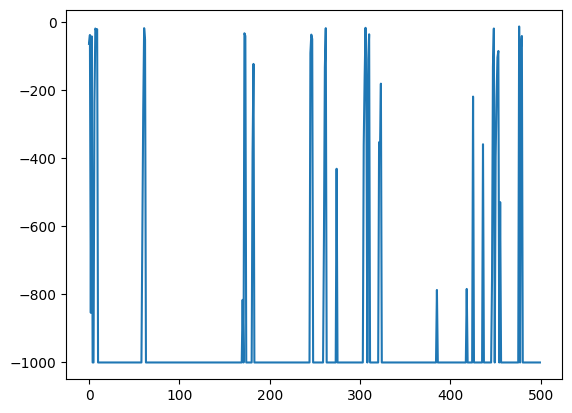

In [ ]:
# Initialize environment and agent
environment = GridWorld()
random_agent = RandomAgent()

reward_per_episode = play(environment, random_agent, trials=500)

# Simple learning curve
plt.plot(reward_per_episode)

#This is a reward curve for the random agent — it shows how much reward the agent earned in each game (episode) over 500 tries.

## Q-Agent

- Here the Q-Learning agent is ran for 500 trials again
- Performance is plotted
- Performance increases greatly

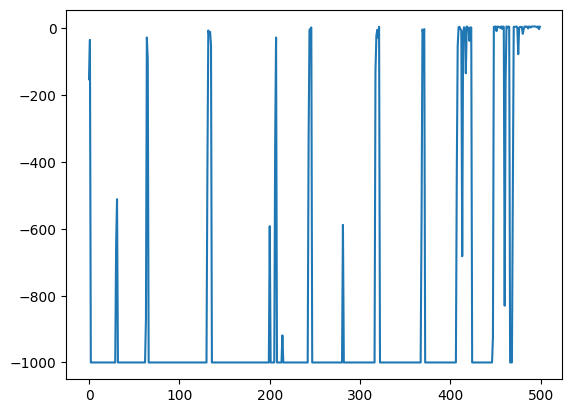

In [ ]:
environment = GridWorld()
agentQ = Q_Agent(environment)

# Note the learn=True argument!
reward_per_episode = play(environment, agentQ, trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)

#This time, instead of a random agent, we are using a Q-learning agent — a robot that learns from experience.

Print the final Q-value table with nice formatting.

In [ ]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


pretty(agentQ.q_table)
#he code is printing out the Q-table —
#which is basically the memory or knowledge that your Q-learning agent built while learning.
#A Q-value is a number showing how good or bad that action is at this state:
#Higher (closer to 0 or positive) → better choice
#Lower (more negative) → worse choice


Streaming output truncated to the last 5000 lines.
		-1.0177175656839001
	LEFT
		-1.00032145111
	RIGHT
		-1.0051699071080002
(94, 45)
	UP
		-1.020545206418
	DOWN
		-1.08620665497
	LEFT
		-1.00905633954
	RIGHT
		-0.9945628067700001
(94, 46)
	UP
		-0.99977900203
	DOWN
		-1.0752191112170002
	LEFT
		-0.9964737707500002
	RIGHT
		-1.02312201485
(94, 47)
	UP
		-1.086354360191
	DOWN
		-1.00025435566
	LEFT
		-1.0211517302430002
	RIGHT
		-1.021559831561
(94, 48)
	UP
		-1.0099799411500001
	DOWN
		-0.98709894756
	LEFT
		-1.033814585927
	RIGHT
		-1.0084336403790002
(94, 49)
	UP
		-1.0179131114539999
	DOWN
		-0.9917778979000001
	LEFT
		-1.00586816659
	RIGHT
		-0.9790122056399999
(94, 50)
	UP
		-0.96951351231
	DOWN
		-0.97766028369
	LEFT
		-0.9987922747000001
	RIGHT
		-1.00543331026
(94, 51)
	UP
		-1.0121984641000001
	DOWN
		-1.001858348089
	LEFT
		-0.9999760296700001
	RIGHT
		-1.034917175063
(94, 52)
	UP
		-1.0746730514090999
	DOWN
		-0.9993684204000001
	LEFT
		-1.0050541885370001
	RIGHT
		-0.984877

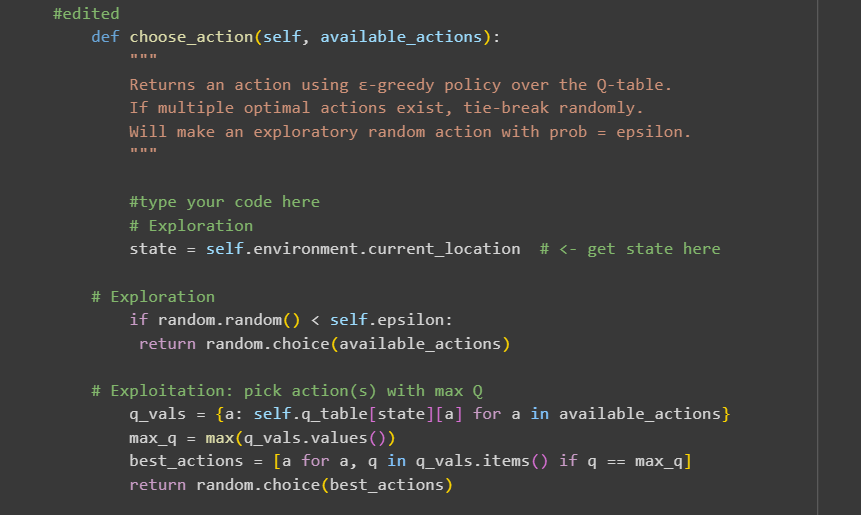

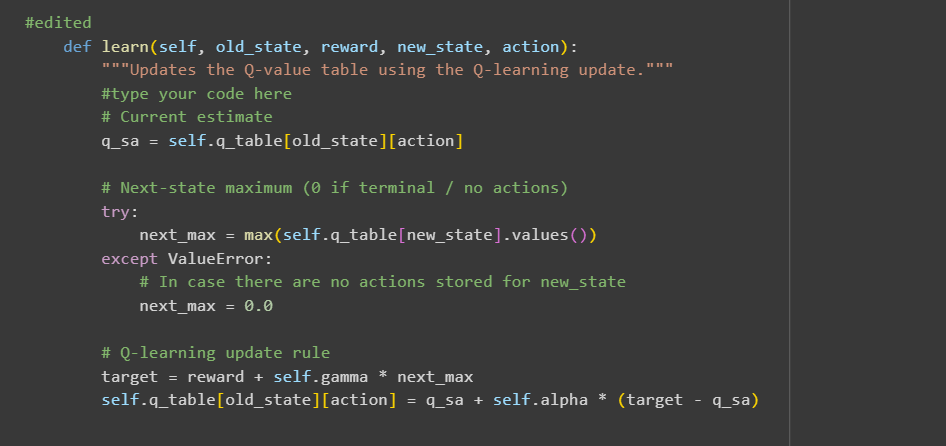